In [45]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.linear_model import LogisticRegression
import re
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
df_train=pd.read_csv('datacamp_facebook_live_titanic/data/train.csv')
df_test=pd.read_csv('datacamp_facebook_live_titanic/data/test.csv')
survived_train=df_train['Survived']
data=pd.concat([df_train.drop(['Survived'],axis=1), df_test])
data['Age']=data['Age'].fillna(data['Age'].median())
data['Fare']=data['Fare'].fillna(data['Fare'].median())
data=pd.get_dummies(data,columns=['Sex'],drop_first=True)
data=data[['Sex_male','Fare','Age','Pclass','SibSp']]
data_train = data.iloc[:891]
data_test = data.iloc[891:]
X=data_train.values
y=survived_train.values
test=data_test.values
clf=tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)
y_pred=clf.predict(test)
df_test['Survived']=y_pred
df_test[['PassengerId', 'Survived']].to_csv('datacamp_facebook_live_titanic/data/predictions/1st_dec_tree.csv', index=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


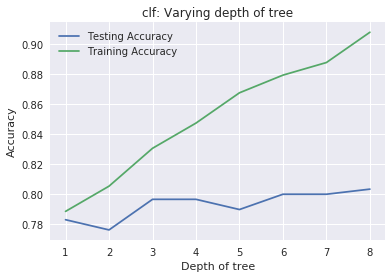

In [41]:
dep = np.arange(1, 9)
train_accuracy = np.empty(len(dep))
test_accuracy = np.empty(len(dep))

# Loop over different values of k
for i, k in enumerate(dep):
    # Setup a k-NN Classifier with k neighbors: knn
    clf = tree.DecisionTreeClassifier(max_depth=k)

    # Fit the classifier to the training data
    clf.fit(X_train, y_train)

    #Compute accuracy on the training set
    train_accuracy[i] = clf.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = clf.score(X_test, y_test)

# Generate plot
plt.title('clf: Varying depth of tree')
plt.plot(dep, test_accuracy, label = 'Testing Accuracy')
plt.plot(dep, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Depth of tree')
plt.ylabel('Accuracy')
plt.show()


In [46]:
import pandas as pd
df=pd.read_csv('datacamp_facebook_live_titanic/data/predictions/1st_dec_tree.csv')
df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
